In [ ]:
path_to_data = './Colton AI project/Myositis Images/CD27 Panel-- Component/121919_Myo089_[7559,39143]_component_data.tif'

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def read_tiff(path):
    """
    path - Path to the multipage-tiff file
    """
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)

img = read_tiff(path_to_data)

/home/fz477/capstone/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:785: UserWarning: [Errno 22] Invalid argument
  warnings.warn(str(msg))
/home/fz477/capstone/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


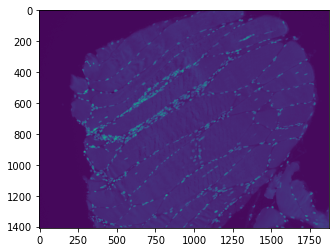

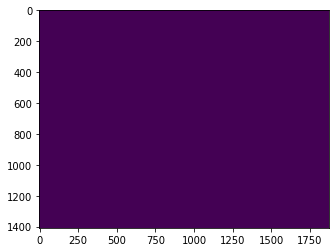

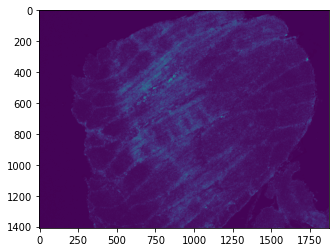

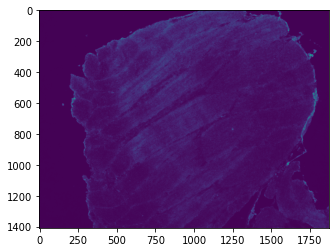

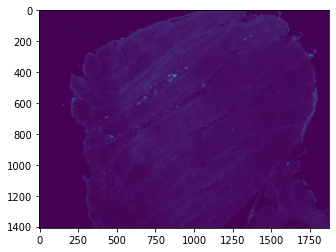

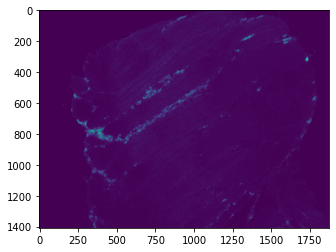

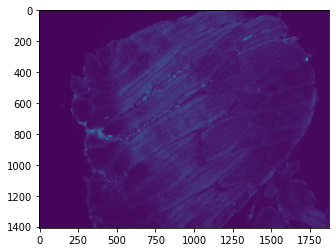

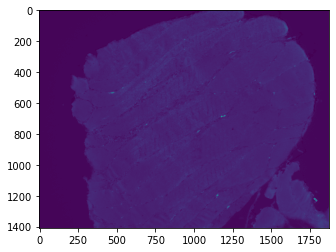

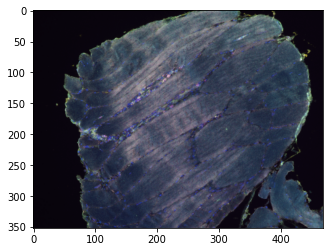

In [ ]:
for _ in range(9):
  plt.imshow(img[_])
  plt.show()

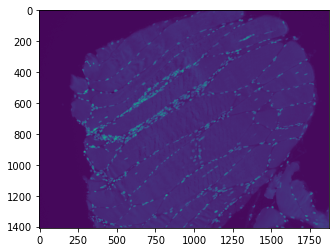

In [ ]:
plt.imshow(img[0])

In [ ]:
def window_nd(a, window, steps = None):
    ashp = a.shape
    pad = np.zeros((len(window),2))
    for _ in range(pad.shape[0]):
      pad[_,1] = window[_] - (steps[_] * (window[_] // steps[_]) + ashp[_] % steps[_])
      while pad[_,1] < 0:
        pad[_,1] += steps[_]
    pad = pad.astype(int)
    a = np.pad(a, pad)
    ashp = np.array(a.shape)
    wshp = np.array(window).reshape(-1)
    if steps:
        stp = np.array(steps).reshape(-1)
    else:
        stp = np.ones_like(ashp)
    astr = np.array(a.strides)
    assert np.all(np.r_[ashp.size == wshp.size, wshp.size == stp.size, wshp <= ashp])
    shape = tuple((ashp - wshp) // stp + 1) + tuple(wshp)
    strides = tuple(astr * stp) + tuple(astr)
    as_strided = np.lib.stride_tricks.as_strided
    aview = as_strided(a, shape = shape, strides = strides)
    return aview

In [ ]:
aview = window_nd(img[0], (256, 256), (256,256))
print(aview.shape)
aview = aview.reshape(-1, 256, 256)

(6, 8, 256, 256)


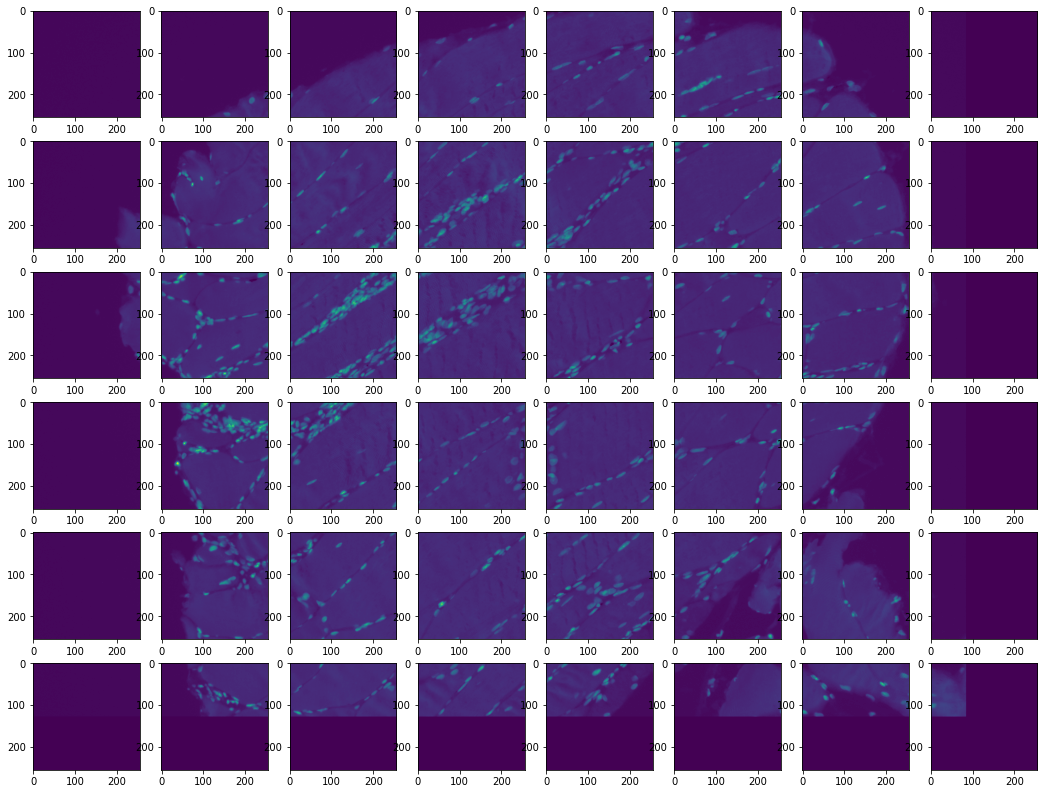

In [ ]:
fig = plt.figure(figsize=(18,14))
for _ in range(aview.shape[0]):
  plt.subplot(6,8,_+1)
  plt.imshow(aview[_], vmin=img[0].min(), vmax=img[0].max())
plt.show()

In [ ]:
import pandas as pd

In [ ]:
label = pd.read_table('./Colton AI project/Myositis Images/Labels/CD27 cell labels/121919_Myo089_[7559,39143]_component_datalabels', usecols=[1,2,3])

In [ ]:
target = np.zeros(img[0].shape)
for x, y in zip(label.X, label.Y):
    target[int(y)-1, int(x)-1] = 1

In [ ]:
aview = window_nd(target, (256, 256), (256,256))
print(aview.shape)
aview = aview.reshape(-1, 256, 256)

(6, 8, 256, 256)


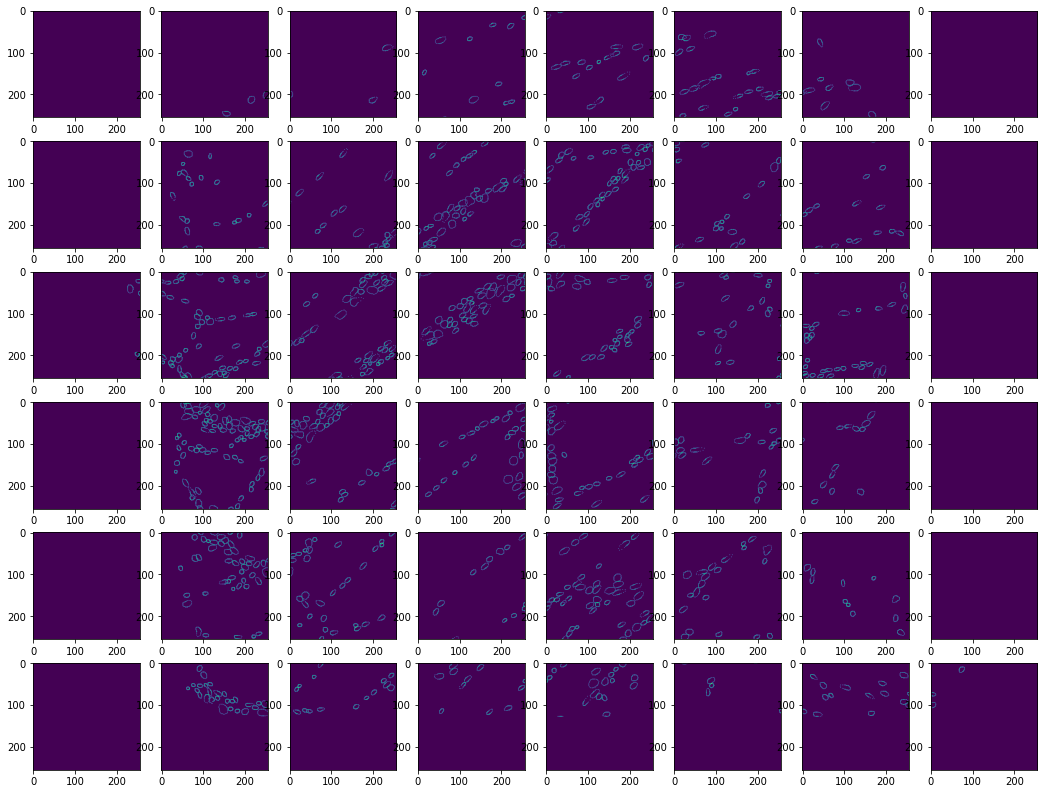

In [ ]:
fig = plt.figure(figsize=(18,14))
for _ in range(aview.shape[0]):
  plt.subplot(6,8,_+1)
  plt.imshow(aview[_], vmin=target.min(), vmax=target.max())
plt.show()

In [ ]:
mask_label_path = './Colton AI project/Myositis Images/Labels/CD27 cell labels/Mask Labels/121919_Myo089_[7559,39143]_component_data.tifMask.tif'

In [ ]:
mask_label = read_tiff(mask_label_path)

In [ ]:
aview = window_nd(mask_label[0], (256, 256), (256,256))
print(aview.shape)
aview = aview.reshape(-1, 256, 256)

(6, 8, 256, 256)


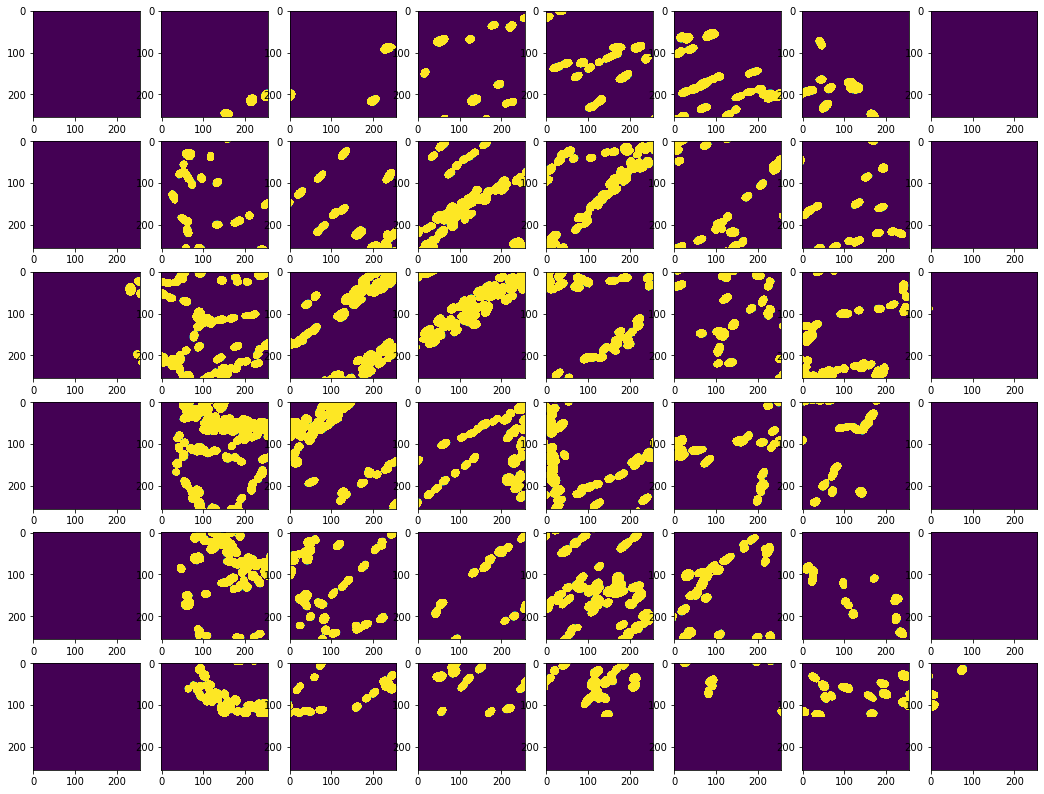

In [ ]:
fig = plt.figure(figsize=(18,14))
for _ in range(aview.shape[0]):
  plt.subplot(6,8,_+1)
  plt.imshow(aview[_], vmin=target.min(), vmax=target.max())
plt.show()

In [ ]:
import os
from tqdm import tqdm

In [ ]:
data_file = os.listdir('./Colton AI project/Myositis Images/CD27 Panel-- Component')
label_file = os.listdir('./Colton AI project/Myositis Images/Labels/CD27 cell labels')
label_file.remove('Bounding Rectangle')
label_file.remove('Mask Labels')
mask_label_file = os.listdir('./Colton AI project/Myositis Images/Labels/CD27 cell labels/Mask Labels')

In [ ]:
selected_data = set([_[:-9] for _ in data_file]).intersection(set([_[:-11] for _ in label_file])).intersection(set([_[:-17] for _ in mask_label_file]))
print(len(selected_data))

198


In [ ]:
for _ in tqdm(selected_data):
    path_to_data = './Colton AI project/Myositis Images/CD27 Panel-- Component/' + _ + '_data.tif'
    img = read_tiff(path_to_data)
    aview = window_nd(img[0], (256, 256), (256,256))
    aview = aview.reshape(-1, 256, 256)
    for idx in range(aview.shape[0]):
        np.save('./Colton AI project/Myositis Images/train_data/' + _ + '_data_' + str(idx), aview[idx])
    
    path_to_target = './Colton AI project/Myositis Images/Labels/CD27 cell labels/' + _ + '_datalabels'
    label = pd.read_table(path_to_target, usecols=[1,2,3])
    target = np.zeros(img[0].shape)
    for x, y in zip(label.X, label.Y):
        try:
            target[int(y)-1, int(x)-1] = 1
        except:
            continue
    aview = window_nd(target, (256, 256), (256,256))
    aview = aview.reshape(-1, 256, 256)
    for idx in range(aview.shape[0]):
        np.save('./Colton AI project/Myositis Images/train_label/' + _ + '_target_' + str(idx), aview[idx])
        
    path_to_mask_label = './Colton AI project/Myositis Images/Labels/CD27 cell labels/Mask Labels/' + _ + '_data.tifMask.tif'
    img = read_tiff(path_to_mask_label)
    aview = window_nd(img[0], (256, 256), (256,256))
    aview = aview.reshape(-1, 256, 256)
    for idx in range(aview.shape[0]):
        np.save('./Colton AI project/Myositis Images/train_mask_label_tile_10/' + _ + '_mask_' + str(idx), aview[idx])

100%|██████████| 198/198 [00:16<00:00, 11.79it/s]
